In [409]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import rcParams

rcParams['figure.dpi']=150

In [410]:
#Cargamos los datos obtenidos en el laboratorio:

In [411]:
data = np.loadtxt('datos_practica.txt')

In [412]:
fraccion_molar = data[:,0]
indice_refraccion = data[:,2]

In [413]:
#Vamos a representar la fraccion molar frente al indice de refraccion:

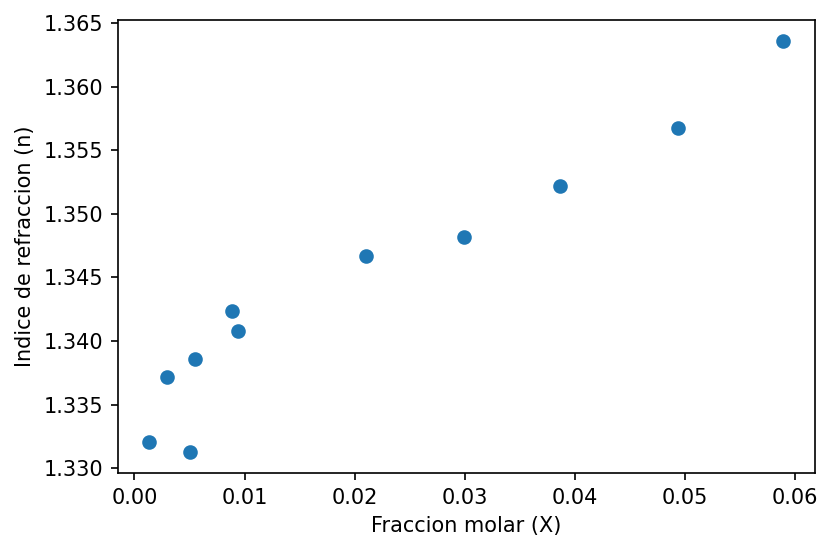

In [414]:
plt.scatter(fraccion_molar,indice_refraccion)
plt.xlabel('Fraccion molar (X)')
plt.ylabel('Indice de refraccion (n)')
plt.show()

Para obtener la fraccion molar de saturacion vamos a ajustar los datos a una ecuacion cuadratica de la forma $n=X^2 a + bX+c$:

In [415]:
#Definimos funcion a ajustar:

In [416]:
def cuadratica(x,d,e,f):
    return (x**2)*d +x*e + f

In [417]:
popt, pcov = curve_fit(cuadratica, fraccion_molar, indice_refraccion)

In [418]:
popt

array([-1.51249892,  0.56777821,  1.33382628])

In [419]:
perr = np.sqrt(np.diag(pcov))

In [420]:
perr

array([3.16761969e+00, 1.84033165e-01, 1.74074959e-03])

In [421]:
Xfit=np.arange(0.00001,0.075,0.0001) #Valores para x equidistantes

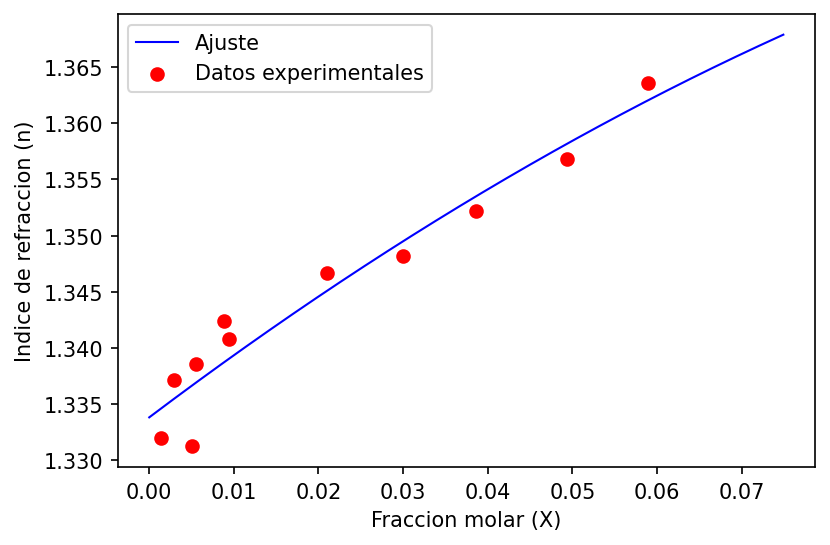

In [422]:
plt.scatter(fraccion_molar,indice_refraccion,
            c='red',
            label='Datos experimentales')

plt.plot(Xfit,cuadratica(Xfit,*popt),
         'b',
        linewidth=1,
        label='Ajuste')

plt.xlabel('Fraccion molar (X)')
plt.ylabel('Indice de refraccion (n)')
plt.legend()
plt.savefig('ajuste1.pdf')
plt.show()

In [423]:
#Los parametros del ajuste y sus errores son:

In [424]:
a=popt[0]
b=popt[1]
c=popt[2]
s_a=perr[0]
s_b=perr[1]
s_c=perr[2]
print(a)
print(s_a)
print(b)
print(s_b)
print(c)
print(s_c)

-1.5124989192074412
3.1676196931615
0.5677782123012718
0.18403316503072956
1.333826277102776
0.0017407495920084115


Obtenidos los valores de las constantes, despejaremos en la ecuacion cuadratica el valor de la fraccion molar de saturacion utilizando el valor que nos dan del indice de refraccion de la muestra saturada $n_{sat} = 1.36704$


$aX^2 + bX +(c-1.36704)=0$

In [425]:
#Resolvemos polinomio

In [426]:
n_sat=1.36704
d=c-n_sat
pol=np.poly1d([a,b,d])

In [427]:
roots=pol.roots
print(roots)

[0.30289118 0.07249964]


In [428]:
#El valor que buscamos será el de 0.07249964 dado que el otro está fuera del rango admisible

In [429]:
punto_saturacion=roots[1]
print(punto_saturacion)
print(n_sat)

0.07249964114035144
1.36704


In [430]:
#Vamos a graficarlo:

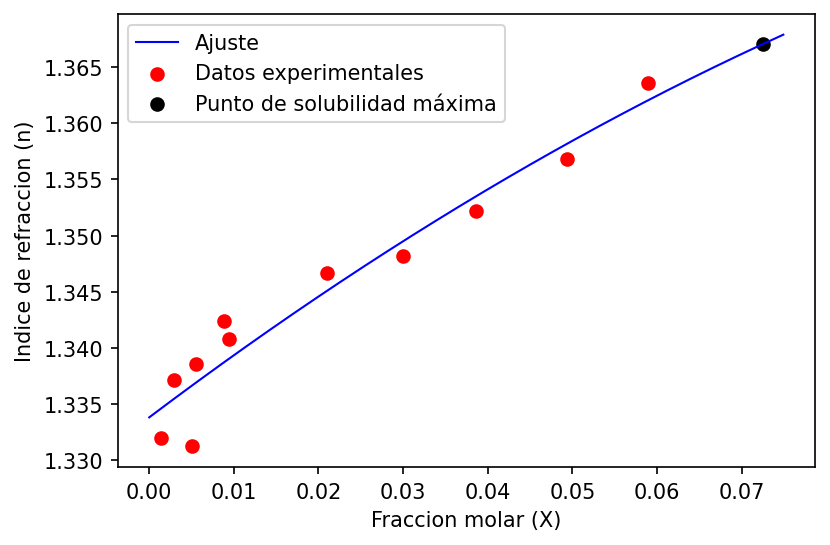

In [431]:
plt.scatter(fraccion_molar,indice_refraccion,
            c='red',
            label='Datos experimentales')

plt.plot(Xfit,cuadratica(Xfit,*popt),
         'b',
        linewidth=1,
        label='Ajuste')

plt.scatter(punto_saturacion,n_sat,
            c='black',
           label='Punto de solubilidad máxima')

plt.xlabel('Fraccion molar (X)')
plt.ylabel('Indice de refraccion (n)')
plt.legend()
plt.savefig('ajuste1.pdf')
plt.show()

In [432]:
#Calculemos el error de la fraccion molar de saturacion  utilizando propagacion de incertidumbres:

# FALTA PROPAGAR

Pasemos ahora al calculo de la *compresibilidad adiabatica*

In [433]:
#Podemos escribir la compresibilidad adiabatica en funcion de la densidad y
#la velocidad el sonido:

$k_S=\frac{1}{\rho v_S^2}$

In [434]:
#Las medidas obtenidas han sido:

In [435]:
vel_sonido=data[:,4]
densidad=data[:,3]
densidad_mKg=densidad*1000
print(vel_sonido)
print(densidad_mKg)

[1512.69 1511.22 1508.19 1578.24 1580.08 1529.75 1522.89 1504.92 1571.63
 1547.24 1562.06]
[996.966 996.965 997.005 996.77  996.309 996.993 996.969 996.986 997.075
 997.079 997.143]


## Calculo compresibilidad adiabatica y su incertidumbre

In [436]:
#Calculo compresibilidad adiabatica y su incertidumbre
def compr_adiab(i,j):
    return 1/(i*(j**2))

In [437]:
compresibilidad_adiabatica=compr_adiab(densidad_mKg,vel_sonido)
print(compresibilidad_adiabatica)# con unidades de 1/Pa

[4.38348758e-10 4.39202398e-10 4.40951221e-10 4.02771701e-10
 4.02020125e-10 4.28614607e-10 4.32495184e-10 4.42878005e-10
 4.06042555e-10 4.18943119e-10 4.11005026e-10]


In [438]:
#Incertidumbre:
def incert_compr_adiab(a1,b1,c1,d1):
    return np.sqrt(((1/((a1**2)*(b1**2)))**2) * (c1**2) + ((1/(a1*b1**3))**2) * (d1**2))

In [439]:
s_densidad=0.005 #en [Kg/m^3]
s_vel_son=0.05 #[m/s]

In [440]:
s_compresibilidad_adiabatica = incert_compr_adiab(densidad_mKg,vel_sonido,s_densidad,s_vel_son)
print(s_compresibilidad_adiabatica)

[1.46548809e-14 1.46973817e-14 1.47848706e-14 1.29191128e-14
 1.28805030e-14 1.41732516e-14 1.43645251e-14 1.48810260e-14
 1.30773700e-14 1.37004339e-14 1.33163118e-14]


### Representemos graficamente:

In [441]:
#densidad frente a fraccion molar:

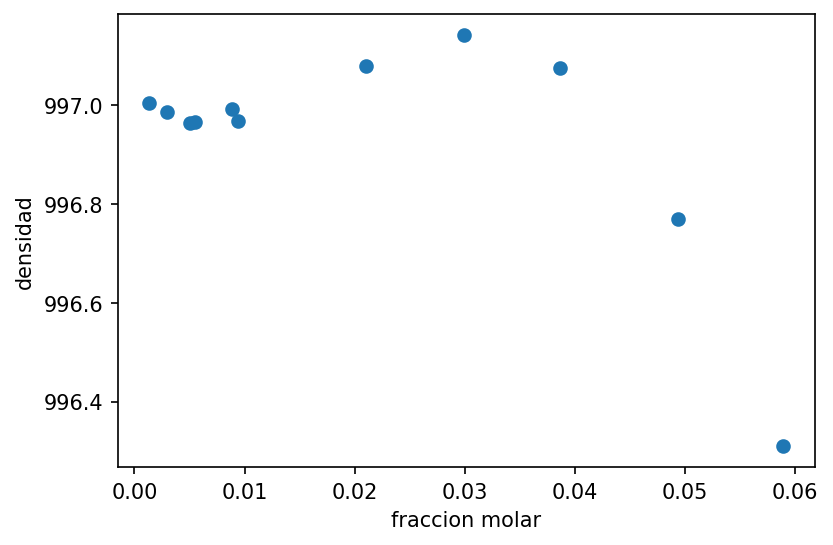

In [442]:
plt.scatter(fraccion_molar,densidad_mKg)


plt.xlabel('fraccion molar')
plt.ylabel('densidad')
plt.show()

vemos como a medida que aumenta la fraccion molar(concentracion de la ciclopentanona) disminuye la densidad, si disminuye la densidad tendriamos que observar un aumento de la velocidad del sonido en la mezcla ya que este opone menor resistencia a la onda por ser menos denso

In [443]:
#velocidad del sonido frente a fraccion molar:

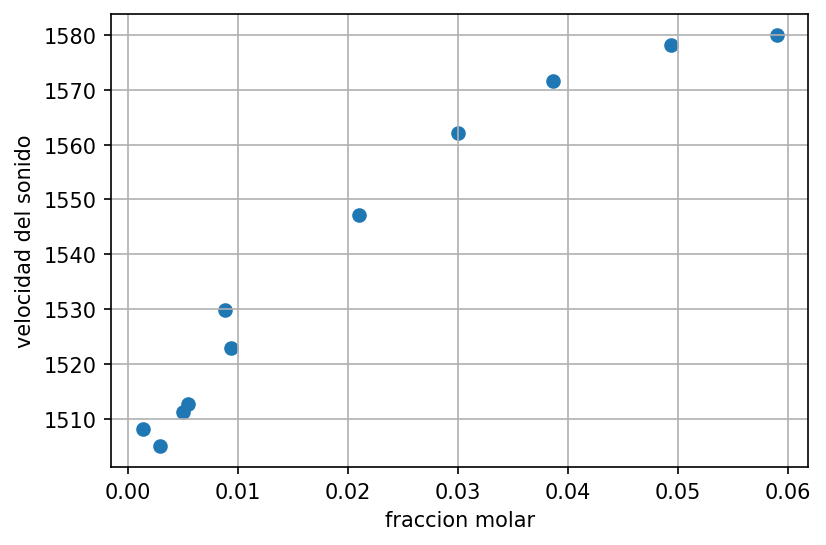

In [444]:
plt.scatter(fraccion_molar,vel_sonido)


plt.xlabel('fraccion molar')
plt.ylabel('velocidad del sonido')
plt.grid()
plt.show()

Podemos observar que empieza a saturar en torno a los 1580 para una concentracion de ~0.06 esto es, la velocidad del sonido del soluto tenderá a ~1580----Podriamos ver si ajusta a un logaritmo!!

In [445]:
#Represento ahora la compresibilidad adiabatica frente a la fraccion molar:

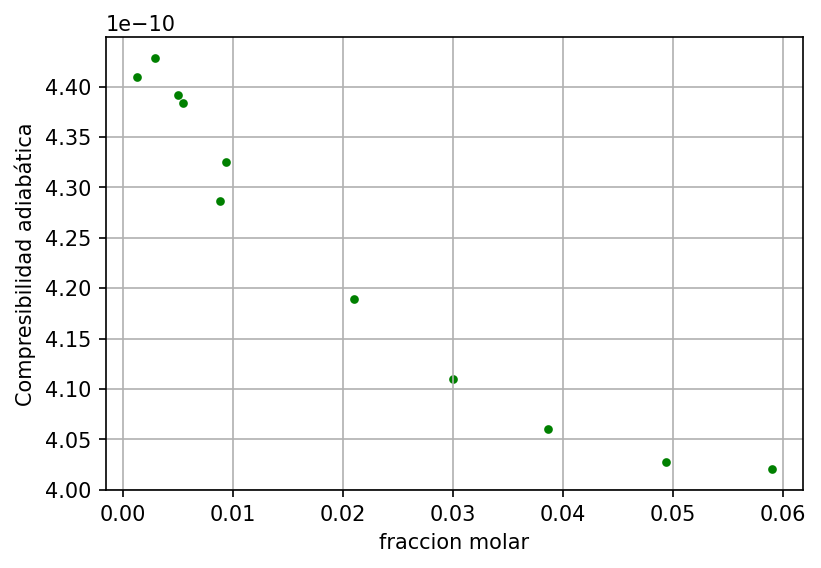

In [446]:
plt.scatter(fraccion_molar, compresibilidad_adiabatica,
            s=10,
         c='green')


plt.xlabel('fraccion molar')
plt.ylabel('Compresibilidad adiabática')
plt.grid()
plt.show()

# Comenzamos el estudio con el tensoactivo

Hemos elegido una temperatura baja, suponiendo que el estudio de la tension superficial presentaría una mayor estabilidad para esta temperatura ( mayor precisión en las medidas) debido a una mayor densidad:

In [447]:
data_tensoactivo = np.loadtxt('datos_tensoactivo.txt', comments='%')

In [448]:
concentracion_tensoactivo = data_tensoactivo[:,0]

In [449]:
tension_superficial = data_tensoactivo[:,1]

In [450]:
s_tens_sup = data_tensoactivo[:,2]

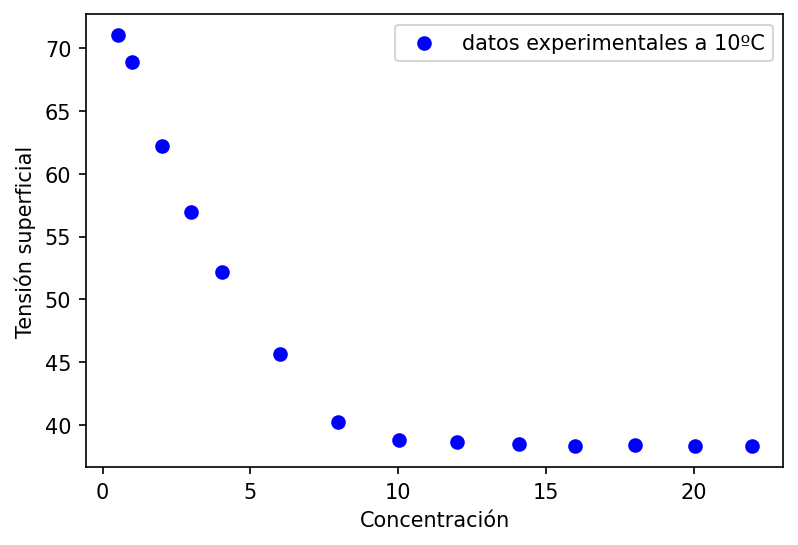

In [451]:
#Represento concentracion frente a tension:

plt.scatter(concentracion_tensoactivo,tension_superficial,
            c='blue',
           label='datos experimentales a 10ºC')

plt.xlabel('Concentración')
plt.ylabel('Tensión superficial')
plt.legend()
plt.show()







### Pasemos al cálculo de la concentracion micelar crítica:
hemos obtenido el dato de la tension superficial del agua a 10º en https://www.researchgate.net/figure/Values-of-the-surface-tension-of-water-at-different-temperatures-1_tbl1_231143777

In [452]:
#defino la presion superficial como pi=tension_sup_agua - tension_superficial

In [453]:
tension_sup_agua = 74.01

In [454]:
pi = tension_sup_agua - tension_superficial

In [455]:
pi

array([ 2.94,  5.14, 11.8 , 17.02, 21.83, 28.4 , 33.79, 35.22, 35.37,
       35.53, 35.73, 35.63, 35.68, 35.68])

In [456]:
s_pi= s_tens_sup

In [457]:
s_pi

array([0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.02,
       0.  , 0.  , 0.01])

In [458]:
#Calculo a su vez pi_max como la media de la presion superficial en la
#zona de saturacion que comienza en el dato 8 de la concentracion

In [459]:
zona_saturacion_presion= pi>=35.22

In [460]:
zona_sat_presion=pi[zona_saturacion_presion]

In [461]:
zona_sat_presion

array([35.22, 35.37, 35.53, 35.73, 35.63, 35.68, 35.68])

In [462]:
#Pi max será la media:
pi_max=np.mean(zona_sat_presion)

In [463]:
pi_max

35.548571428571435

In [464]:
s_i_cuadr=(s_pi)**2

suma_s_i= sum(s_i_cuadr)
s_pi_max=np.sqrt(suma_s_i)

In [465]:
s_pi_max

0.048989794855663564

In [466]:
#Ahora grafico pi frente a la concentracion de tensoactivo:

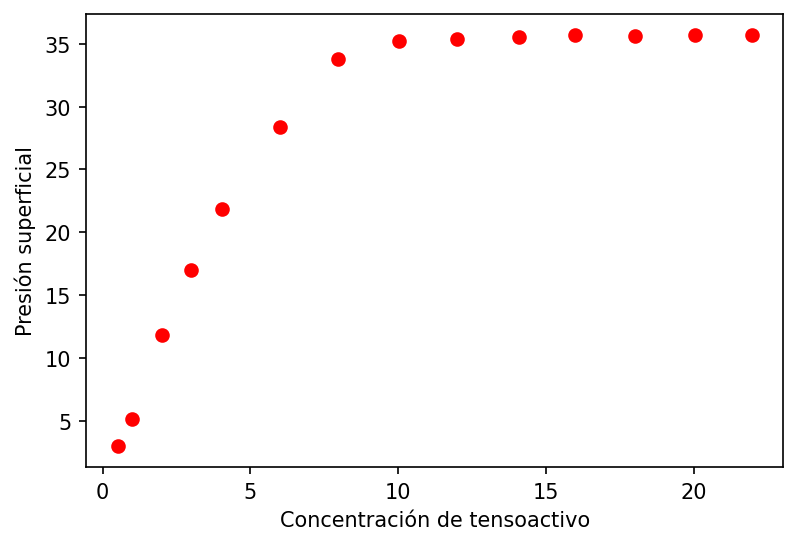

In [467]:
plt.scatter(concentracion_tensoactivo, pi,
           c='r',
           label='datos')
plt.xlabel('Concentración de tensoactivo')
plt.ylabel('Presión superficial')
plt.show()

In [468]:
#Ahora ajustamos los datos a la ecuacion (3) del artículo:
#Squeezing experimental measurements for a proper analysis of
#surfactant thermodynamics

#El ajuste será de la forma y=ax + b, donde x=ln(concentracion)

In [469]:
x_concetracion= np.log(concentracion_tensoactivo)

In [470]:
concentracion_tensoactivo

array([ 0.51,  1.01,  2.02,  2.99,  4.05,  6.01,  7.98, 10.04, 12.  ,
       14.1 , 16.  , 18.02, 20.05, 21.97])

In [471]:
#vamos a utilizar los datos del 1 al 6 para obtener X_cmc


zona_lineal1 = (pi<=35.37)
zona_lineal2 = pi[zona_lineal1]
zona_lineal3 = (zona_lineal2 >= 5.14)
zona_lineal_pi = zona_lineal2[zona_lineal3]

zona_lin_con1 = (concentracion_tensoactivo<=10.04)
zona_lin_con2 = concentracion_tensoactivo[zona_lin_con1]
zona_lin_con3 = (zona_lin_con2 >=1.01)
zona_lineal_con = zona_lin_con2[zona_lin_con3]

log_zona_lineal_con = np.log(zona_lineal_con)

In [472]:
log_zona_lineal_con

array([0.00995033, 0.70309751, 1.09527339, 1.39871688, 1.79342475,
       2.07693841, 2.30657711])

In [473]:
zona_lineal_pi

array([ 5.14, 11.8 , 17.02, 21.83, 28.4 , 33.79, 35.22])

In [474]:
def ajustelineal(x,a,b):
    return (x*a) + b

In [475]:
popt, pcov = curve_fit(ajustelineal, log_zona_lineal_con, zona_lineal_pi)
perr = np.sqrt(np.diag(pcov))

In [476]:
popt

array([13.89936847,  3.25266098])

In [477]:
perr

array([0.72380093, 1.11127847])

In [478]:
from scipy.stats import linregress
ec_gibbs=linregress(log_zona_lineal_con, zona_lineal_pi)

In [479]:
ec_gibbs

LinregressResult(slope=13.899368509776753, intercept=3.2526609054678524, rvalue=0.9932888180801024, pvalue=7.061357011670883e-06, stderr=0.7238009382036353, intercept_stderr=1.1112784748441538)

In [480]:
#con la pendiente y el termino independiente sacamos X_cmc

In [481]:
def con_crit(a,b,c):
    return np.exp((a-b)/c)
#a=pi_max
#b=termino independiente ajuste
#c=pendiente ajuste

In [482]:
pendiente= ec_gibbs.slope
termino_indep=ec_gibbs.intercept

In [483]:
X_cmc = np.exp((pi_max - termino_indep)/pendiente)

In [484]:
X_cmc

10.21188625976799

In [485]:
# y su incertidumbre vendra dada por:
def incert_X_cmc(i,j,k,l,m):
    return np.sqrt( i*(np.exp(2)*(j**2 + k**2) + (1/l**2)*m**2))
#i=X_cmc
#j=s_pi_max
#k=s_termino indep
#l=pendiente
#m=s_pendiente

In [486]:
s_pendiente=ec_gibbs.stderr
s_termino_indep=ec_gibbs.intercept_stderr

In [487]:
s_X_cmc= incert_X_cmc(X_cmc,s_pi_max,s_termino_indep,pendiente,s_pendiente)

In [488]:
s_X_cmc

9.66398756365463

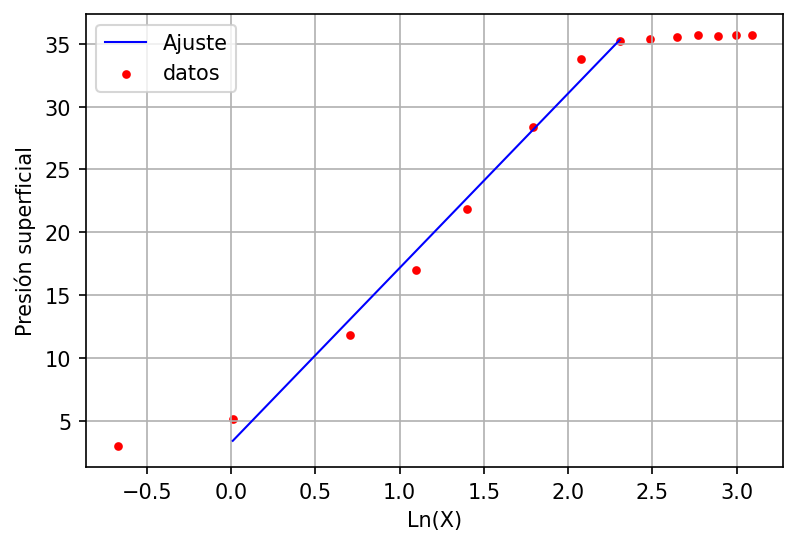

In [491]:
concentracion_tensoactivo_logaritmo=np.log(concentracion_tensoactivo)
plt.scatter(x_concetracion, pi,
            s=10,
           c='r',
           label='datos')

plt.plot(log_zona_lineal_con,ajustelineal(log_zona_lineal_con,*popt),
         'b',
        linewidth=1,
        label='Ajuste')

plt.xlabel('Ln(X)')
plt.ylabel('Presión superficial')
plt.grid()
plt.legend()
plt.show()

In [490]:
np.log(X_cmc)

2.323552361417484